 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head

<bound method NDFrame.head of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN     

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head

<bound method NDFrame.head of               Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]>

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head

<bound method NDFrame.head of                Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]>

In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']

C:\Users\luihe\AppData\Local\Temp\ipykernel_10924\1142444986.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [11]:
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtype

dtype('float64')

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={
    'Close':'S&P500 Close'})
sp500_df.head()

,S&P500 Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

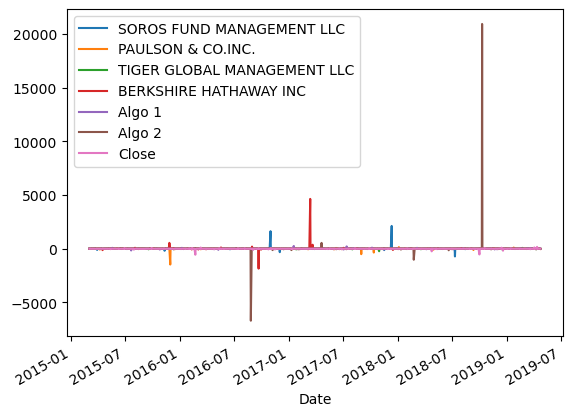

In [16]:
# Plot daily returns of all portfolios
combined_df.sort_index(ascending=True, inplace=True)
daily_returns = combined_df.pct_change()
daily_returns.plot()

#### Calculate and Plot cumulative returns.

C:\Users\luihe\anaconda3\envs\alpacaenv\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

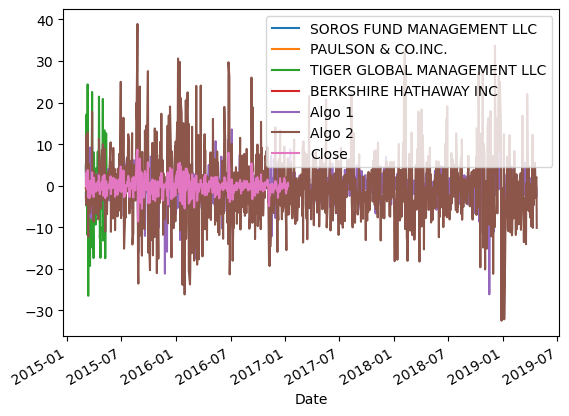

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

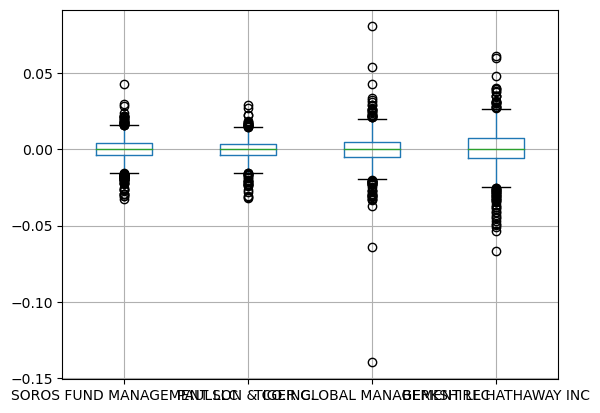

In [18]:
# Box plot to visually show risk
whale_df.boxplot(figsize=None)

<Axes: >

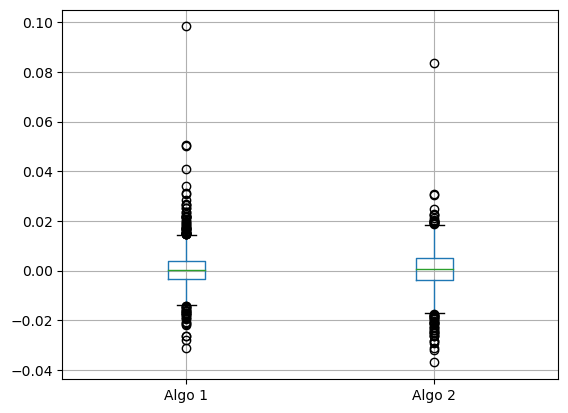

In [19]:
algo_df.boxplot()

<Axes: >

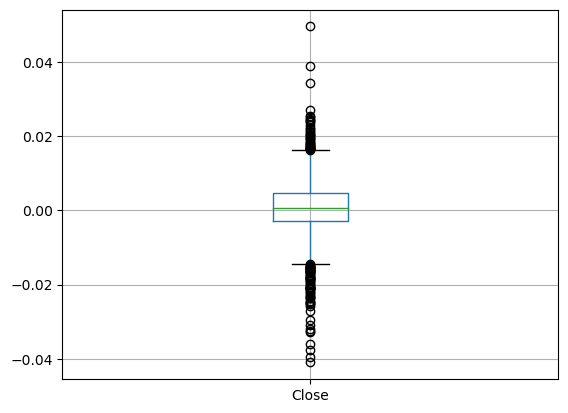

In [20]:
sp500_returns.boxplot()


### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
std_dev = daily_returns.std() * np.sqrt(252)
std_dev

SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                           249.404199
Algo 2                         10829.346406
Close                                   NaN
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_returns.std() * np.sqrt(252)
sp500_std
# Determine which portfolios are riskier than the S&P 500


Close    0.128762
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = std_dev * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC                NaN
PAULSON & CO.INC.                        NaN
TIGER GLOBAL MANAGEMENT LLC              NaN
BERKSHIRE HATHAWAY INC                   NaN
Algo 1                           3959.168924
Algo 2                         171910.544703
Close                                    NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: ylabel='Frequency'>

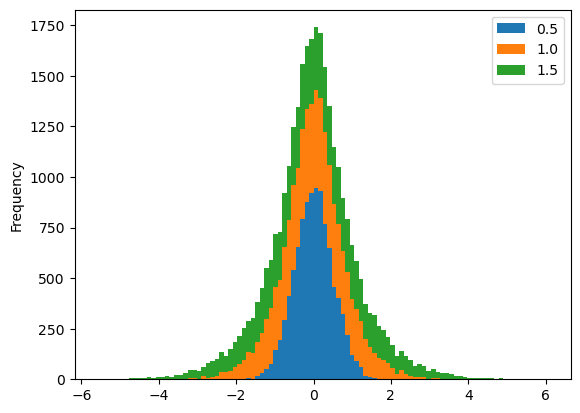

In [49]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_21std = np.random.normal(scale=0.5, size=10000)
algo_21std = np.random.normal(scale=1.0, size=10000)
sp500_21std = np.random.normal(scale=1.5, size=10000)
# Plot the rolling standard deviation
rolling_std = pd.DataFrame({
    "0.5": whale_21std,
    "1.0": algo_21std,
    "1.5": sp500_21std
})
rolling_std.plot.hist(stacked=True, bins=100)


### Calculate and plot the correlation

In [50]:
# Calculate the correlation
correlation = daily_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.002890,0.022263,0.000339,0.000038,-0.005757,0.000906
PAULSON & CO.INC.,0.002890,1.000000,0.035632,0.002151,0.006392,0.010881,0.006233
TIGER GLOBAL MANAGEMENT LLC,0.022263,0.035632,1.000000,-0.014014,0.003318,-0.004644,0.029131
BERKSHIRE HATHAWAY INC,0.000339,0.002151,-0.014014,1.000000,-0.005766,0.003690,-0.016201
Algo 1,0.000038,0.006392,0.003318,-0.005766,1.000000,0.000467,-0.012039
Algo 2,-0.005757,0.010881,-0.004644,0.003690,0.000467,1.000000,0.021825
Close,0.000906,0.006233,0.029131,-0.016201,-0.012039,0.021825,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [51]:
# Calculate covariance of a single portfolio
whale_covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].cov(daily_returns['Close'])
whale_covariance
# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


nan

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios


In [29]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock


In [31]:
# Reading data from 2nd stock


In [32]:
# Reading data from 3rd stock


In [33]:
# Combine all stocks in a single DataFrame


In [34]:
# Reset Date index


In [35]:
# Reorganize portfolio data by having a column per symbol


In [36]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [41]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [42]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [43]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios


In [45]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!